# Business Analytics Project

## Project Description

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

You have: <br>
-Server logs with data on Yandex.Afisha visits from June 2017 through May 2018 <br>
-Dump file with all orders for the period <br>
-Marketing expenses statistics <br>

You are going to study: <br>
-How people use the product <br>
-When they start to buy <br>
-How much money each customer brings <br>
-When they pay off 

<div id="plan"></div>

## Plan of research:

1. **[Download](#section1) the data and prepare it for analysis [conclusions](#section1c)**; 
2. **Make reports and calculate metrics**; 
  1. **[Product](#section2_1)**
    1. **[How many people](#section2_1_1) use it every day, week, and month? [conclusions](#section2_1_1c)**;
    2. **[How many sessions](#section2_1_2) are there per day? [conclusions](#section2_1_2c)**; 
    3. **[What is the length](#section2_1_3) of each session? [conclusions](#section2_1_3c)**;
    4. **[How often](#section2_1_4) do users come back? [conclusions](#section2_1_4c)**;
  2. **[Sales](#section2_2)**
    1. **[When](#section2_2_1) do people start buying? [conclusions](#section2_2_1c)**;
    2. **[How many orders](#section2_2_2) do they make during a given period of time? [conclusions](#section2_2_2c) [new conclusions](#section2_2_2c1)**;
    3. **What is the [average purchase size?](#section2_2_3) [conclusions](#section2_2_3c)**;
    4. **[How much money](#section2_2_4) do they bring? (LTV) [conclusions](#section2_2_4c)**;
  3. **[Marketing](#section2_3)**
    1. **[How much money was spent?](#section2_3_1) Overall/per source/over time [conclusions](#section2_3_1c)**;
    2. **How much did [customer acquisition](#section2_3_2) from each of the sources cost? [conclusions](#section2_3_2c)**;
    3. **[How worthwhile where the investments?](#section2_3_3) (ROI) [conclusions](#section2_3_3c)**;
3. **Write a [conclusion](#section3): advise marketing experts how much money to invest and where**



<a id="section1"></a>

## Download the data and prepare it for analysis
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from functools import reduce

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
126560,desktop,2017-06-16 19:09:00,2,2017-06-16 19:00:00,14246638970844424077
313458,desktop,2017-06-20 09:07:00,3,2017-06-20 09:07:00,11182217172888703344
192444,touch,2017-06-20 20:29:00,2,2017-06-20 20:21:00,7328714392863230368
143035,touch,2017-12-10 01:27:00,4,2017-12-10 01:22:00,113558792074302268
38847,touch,2018-02-05 16:26:00,9,2018-02-05 16:25:00,332369674592664636
357161,touch,2018-03-24 19:09:00,3,2018-03-24 18:57:00,11523221792225571224
139404,desktop,2018-03-05 13:53:00,5,2018-03-05 13:44:00,12869801667763685675
20598,touch,2017-12-27 01:20:00,5,2017-12-27 01:20:00,10574708257771181454
155959,desktop,2018-02-01 13:06:00,9,2018-02-01 13:05:00,7656830724985256465
141993,desktop,2018-02-02 14:59:00,5,2018-02-02 14:34:00,2389121239754190009


In [3]:
#checking for duplicated rows

visits[visits.duplicated()].empty

True

In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [6]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [7]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
orders.sample(10)

,Buy Ts,Revenue,Uid
13075,2017-10-16 17:10:00,0.92,1520414068215217617
24167,2017-12-15 07:45:00,6.00,11739475828802739092
19783,2017-11-24 21:50:00,4.22,12299540514922428077
21454,2017-12-01 23:08:00,0.85,849800864204629309
23694,2017-12-12 22:19:00,0.03,12497820010814768939
9174,2017-09-26 15:32:00,9.41,12872062913672208847
20631,2017-11-28 12:19:00,7.33,1668300487562478408
45536,2018-04-26 00:20:00,4.28,15262183295361544643
23048,2017-12-09 18:16:00,3.05,534333766012055370
40511,2018-03-18 23:24:00,1.31,2368108627071640769


In [8]:
#checking for duplicated rows

orders[orders.duplicated()].empty

True

In [9]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [11]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [12]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])
costs.sample(10)

,source_id,dt,costs
1834,9,2017-06-19,9.57
402,2,2017-07-10,66.23
207,1,2017-12-25,88.39
50,1,2017-07-21,36.25
1502,5,2017-07-21,61.18
1914,9,2017-09-07,15.72
445,2,2017-08-22,52.39
599,2,2018-01-23,113.58
1158,4,2017-08-09,92.77
804,3,2017-08-18,242.57


In [13]:
#checking for duplicated rows

costs[costs.duplicated()].empty

True

In [14]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<a id="section1c"></a>

We've downloaded the data and optimized it as we can for now. There are no missing values, columns are renamed, we are ready to start exploring.

<a id="section2"></a>
## Make reports and calculate metrics

<a id="section2_1"></a>
### Product

<a id="section2_1_1"></a>
#### How many people use it every day, week, and month?

In [15]:
#extracting date, week, month, and year of the session

visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [16]:
#calculating DAU, WAU, and MAU on average

dau_avg = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_avg = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_avg = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

print('Average daily active users:', int(dau_avg))
print('Average weekly active users:', int(wau_avg))
print('Average monthly active users:', int(mau_avg))

Average daily active users: 907
Average weekly active users: 5716
Average monthly active users: 23228


In [17]:
#calculating DAU for various devices

dau_devices = visits.groupby(['device', 'session_date']).agg({'uid':'nunique'}).reset_index()

In [18]:
#calculating average DAU for various devices

dau_devices = dau_devices.groupby('device').agg({'uid':'mean'}).reset_index()
dau_devices

,device,uid
0,desktop,659.244505
1,touch,252.873278


In [19]:
#average DAU for various devices, visualizatin is less informative here

print('Average number of daily active users for desktop users:', int(dau_devices['uid'][0])) 
print('Average number of daily active users for touch users:', int(dau_devices['uid'][1])) 

Average number of daily active users for desktop users: 659
Average number of daily active users for touch users: 252


In [20]:
#calculating WAU for various devices

wau_devices = visits.groupby(['device', 'session_week']).agg({'uid':'nunique'}).reset_index()

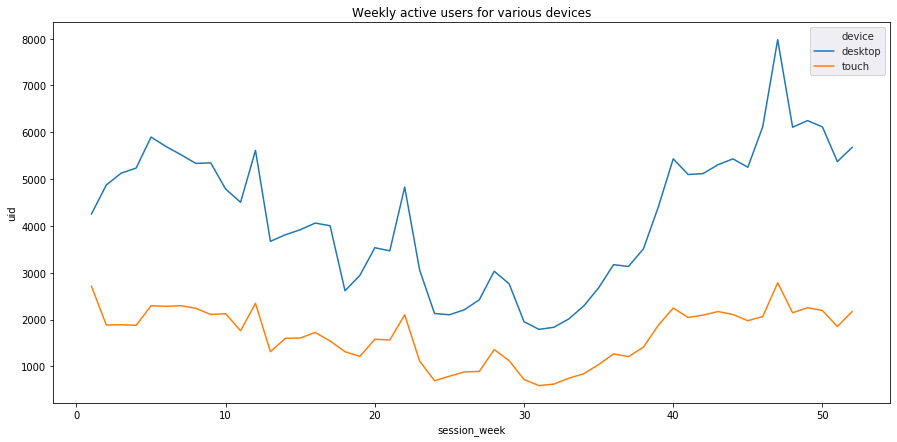

In [21]:
#visualizing WAU for various devices

plt.figure(figsize=(15,7))
plt.title('Weekly active users for various devices')
sns.set_style("darkgrid")
sns.lineplot(data=wau_devices, x="session_week", y="uid", hue="device")
plt.show()

In [22]:
#calculating MAU for various devices

mau_devices = visits.groupby(['device', 'session_month']).agg({'uid':'nunique'}).reset_index()

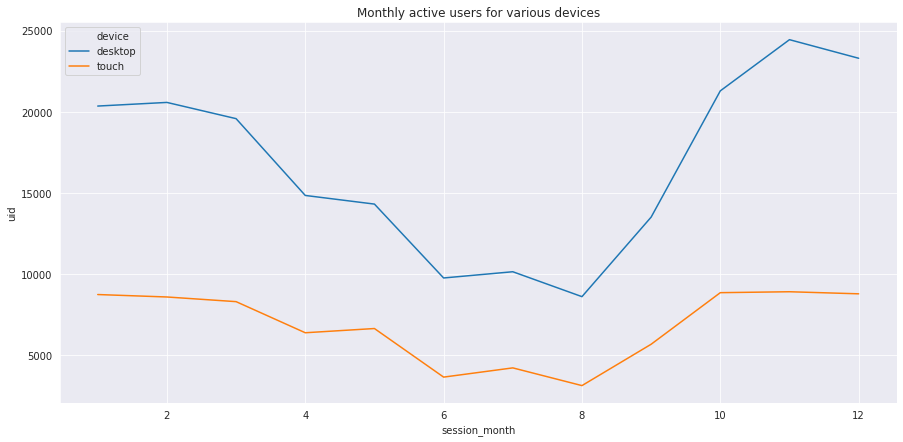

In [23]:
#visualizing MAU for various devices

plt.figure(figsize=(15,7))
plt.title('Monthly active users for various devices')
sns.set_style("darkgrid")
sns.lineplot(data=mau_devices, x="session_month", y="uid", hue="device")
plt.show()

In [24]:
#calculating DAU for various ad sources

dau_sources = visits.groupby(['source_id', 'session_date']).agg({'uid':'nunique'}).reset_index()

In [25]:
#calculating average DAU for various ad sources

dau_sources = dau_sources.groupby('source_id').agg({'uid':'mean'}).reset_index()
dau_sources['uid'] = dau_sources['uid'].astype('int')
dau_sources.columns = ['source_id', 'average_DAU']
dau_sources['percentage'] = (dau_sources['average_DAU'] / dau_sources['average_DAU'].sum()) * 100
dau_sources['percentage'] = dau_sources['percentage'].round(2).astype(str) + '%'
dau_sources

,source_id,average_DAU,percentage
0,1,80,8.46%
1,2,120,12.68%
2,3,232,24.52%
3,4,275,29.07%
4,5,175,18.5%
5,6,1,0.11%
6,7,1,0.11%
7,9,36,3.81%
8,10,26,2.75%


In [26]:
#calculating WAU for various ad sources

wau_sources = visits.groupby(['source_id', 'session_week']).agg({'uid':'nunique'}).reset_index()

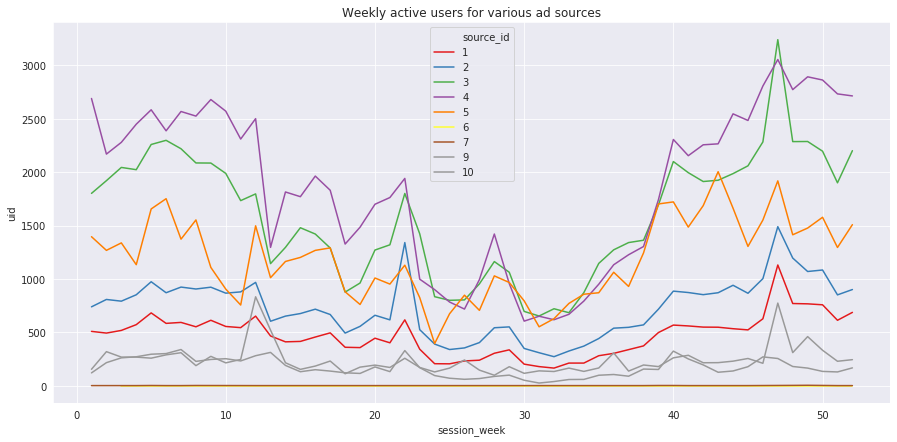

In [27]:
#visualizing WAU for various ad sources

plt.figure(figsize=(15,7))
plt.title('Weekly active users for various ad sources')
sns.set_style("darkgrid")
sns.lineplot(data=wau_sources, x="session_week", y="uid", hue="source_id", legend='full', palette='Set1')
plt.show()

In [28]:
#calculating MAU for various ad sources

mau_sources = visits.groupby(['source_id', 'session_month']).agg({'uid':'nunique'}).reset_index()

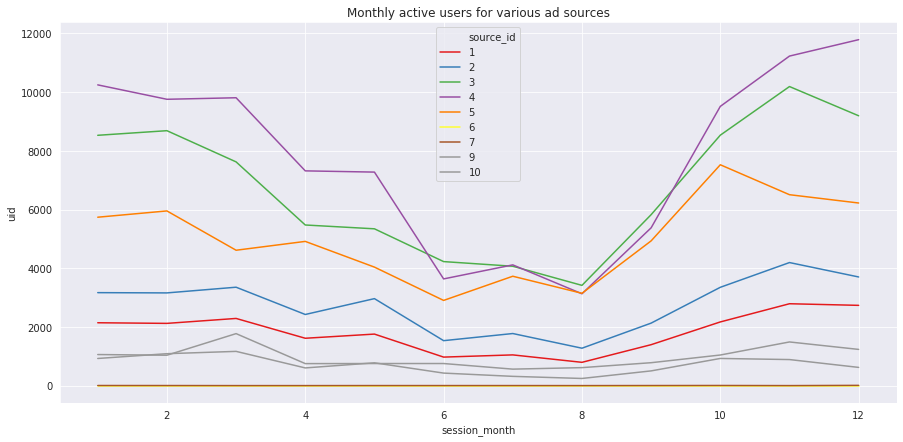

In [29]:
#visualizing MAU for various ad sources

plt.figure(figsize=(15,7))
plt.title('Monthly active users for various ad sources')
sns.set_style("darkgrid")
sns.lineplot(data=mau_sources, x="session_month", y="uid", hue="source_id", legend='full', palette='Set1')
plt.show()

<a id="section2_1_1c"></a>

In general, on average 907 people use it daily, 5716 people use it weekly, and 23228 people use it monthly.
If we look at various devices, we see that percentage of desktop users is significantly higher than that of touch device users.
As for various ad sources - 29% of daily active users come from source 4, 24.5% come from source 3, 18.5% come from source 5, and 12.7% come from source 2. Alltogether these four ad sources bring us lamost 85%% of daily active users. We see pretty much the same picture on graphs for weekly active users and monthly active users, so we can assume that source 4 is the most active, then go sources 3, 5, and 2.

<a id="section2_1_2"></a>
#### How many sessions are there per day? (One user might have more than one session.)

In [30]:
#calculating average number of sessions per day in general

sessions_per_day = visits.groupby('session_date').agg({'uid':'count'}).mean()
print('Sessions per day in general:', int(sessions_per_day))

Sessions per day in general: 987


In [31]:
#calculating average number of sessions per day for different devices

sessions_per_day_devices = visits.groupby(['device','session_date']).agg({'uid':'count'})
sessions_per_day_devices = sessions_per_day_devices.groupby('device').agg({'uid':'mean'}).astype('int')
sessions_per_day_devices.columns = ['sessions_per_day']
sessions_per_day_devices

,sessions_per_day
device,
desktop,721
touch,266


In [32]:
#calculating average number of sessions per day for different ad sources

sessions_per_day_sources = visits.groupby(['source_id','session_date']).agg({'uid':'count'})
sessions_per_day_sources = sessions_per_day_sources.groupby('source_id').agg({'uid':'mean'}).astype('int').reset_index()
sessions_per_day_sources.columns = ['source_id', 'sessions_per_day']
sessions_per_day_sources

,source_id,sessions_per_day
0,1,93
1,2,131
2,3,235
3,4,280
4,5,184
5,6,1
6,7,1
7,9,36
8,10,27


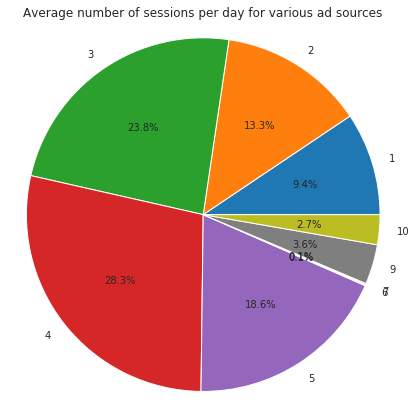

In [33]:
#visualizing average number pf sessions per day for various ad sources

labels = sessions_per_day_sources['source_id']
sizes = sessions_per_day_sources['sessions_per_day']

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Average number of sessions per day for various ad sources')

plt.show()

In [34]:
#calculating average number of sessions per day per user

sessions_per_user = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('Number of sessions per day per user:', sessions_per_user['sessions_per_user'].mean().round(2))

Number of sessions per day per user: 1.08


In [35]:
#calculating average number of sessions per day per user for different devices

sessions_per_user_devices = visits.groupby(['device', 'session_date']).agg({'uid':['count', 'nunique']})
sessions_per_user_devices.columns = ['n_sessions', 'n_users']
sessions_per_user_devices = sessions_per_user_devices.groupby('device').agg({'n_sessions':'mean', 'n_users':'mean'})
sessions_per_user_devices['sessions_per_user'] = sessions_per_user_devices['n_sessions'] / sessions_per_user_devices['n_users']
sessions_per_user_devices

,n_sessions,n_users,sessions_per_user
device,,,
desktop,721.337912,659.244505,1.094189
touch,266.757576,252.873278,1.054906


In [36]:
#calculating average number of sessions per day per user for different ad sources

sessions_per_user_sources = visits.groupby(['source_id', 'session_date']).agg({'uid':['count', 'nunique']})
sessions_per_user_sources.columns = ['n_sessions', 'n_users']
sessions_per_user_sources = sessions_per_user_sources.groupby('source_id').agg({'n_sessions':'mean', 'n_users':'mean'})
sessions_per_user_sources['sessions_per_user'] = sessions_per_user_sources['n_sessions'] / sessions_per_user_sources['n_users']
sessions_per_user_sources

,n_sessions,n_users,sessions_per_user
source_id,,,
1,93.739011,80.557692,1.163626
2,131.201102,120.707989,1.086930
3,235.840220,232.865014,1.012777
4,280.424242,275.454545,1.018042
5,184.311295,175.622590,1.049474
6,1.000000,1.000000,1.000000
7,1.058824,1.058824,1.000000
9,36.575758,36.110193,1.012893
10,27.617080,26.033058,1.060847


<a id="section2_1_2c"></a>

On average, there are 987 sessions per day. In terms of sessions per user - number varies from 1 to 1.16, which is pretty stable for various devices and various ad sources.

<a id="section2_1_3"></a>
#### What is the length of each session?

In [37]:
#creating a column with session duration in seconds

visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [38]:
#checking the percentage of sessions with duration 0 seconds

len(visits[visits['session_duration_sec'] == 0]) / len(visits)

0.0995937673900946

In [39]:
#almost 10%, can drop this

visits = visits.drop(visits[visits['session_duration_sec'] == 0].index)

In [40]:
#checking the distribution

visits['session_duration_sec'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

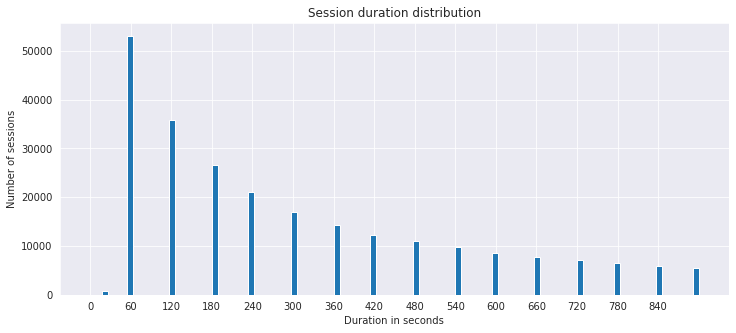

In [41]:
#checking the distribution to see if we can use mean or median for ASL

plt.figure(figsize=(12,5))
ax = visits['session_duration_sec'].hist(bins=100, range=(0, 900))
ax.set_title('Session duration distribution')
ax.set_xlabel('Duration in seconds')
ax.set_ylabel('Number of sessions')
ax.set_xticks(np.arange(0, 900, step=60))
plt.show()

In [42]:
#distribution isn't normal, so we'll use mode() to find average session length

asl = visits['session_duration_sec'].mode()
print('Average session length: {} seconds'.format(asl[0]))

Average session length: 60 seconds


In [43]:
#calculating ASL for various devices

asl_devices = visits.groupby('device').agg({'session_duration_sec':lambda x: x.mode()[0]})
asl_devices

,session_duration_sec
device,
desktop,60
touch,60


In [44]:
#calculating ASL for various ad sources

asl_sources = visits.groupby('source_id').agg({'session_duration_sec':lambda x: x.mode()[0]})
asl_sources

,session_duration_sec
source_id,
1,60
2,60
3,60
4,60
5,60
6,180
7,120
9,60
10,60


<a id="section2_1_3c"></a>

The most "popular" session length is 60 seconds. We can't use mean or median here, since the distribution is not normal, so we use mode. When we try to look at various devices and ad sources - we get pretty much the same results.

<a id="section2_1_4"></a>
#### How often do users come back?

In [45]:
#extracting first visit date for each customer

first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'

In [46]:
#joining tables

visits = visits.join(first_visit_date, on='uid')

In [47]:
#adding new column with retention days - difference between the visit and first visit in days

visits['retention_days'] = ((visits['start_ts'] - visits['first_visit_date']) / np.timedelta64(1, 'D')).astype('int')

In [48]:
#checking the distribution

visits['retention_days'].describe()

count    323606.000000
mean         29.407866
std          65.714366
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         364.000000
Name: retention_days, dtype: float64

In [49]:
#creating new dataframe only with columns needed to calculate retention

retention_rate = visits[['device', 'source_id', 'uid', 'retention_days']].copy()

In [50]:
#creating new columns with retention categories

retention_rate['retention_1d'] = np.where(retention_rate['retention_days'] >= 1, 1, 0)
retention_rate['retention_7d'] = np.where(retention_rate['retention_days'] >= 7, 1, 0)
retention_rate['retention_14d'] = np.where(retention_rate['retention_days'] >= 14, 1, 0)
retention_rate['retention_30d'] = np.where(retention_rate['retention_days'] >= 30, 1, 0)

In [51]:
retention_rate.sample(10)

,device,source_id,uid,retention_days,retention_1d,retention_7d,retention_14d,retention_30d
333725,desktop,3,2922640442596396749,0,0,0,0,0
248568,desktop,5,5748891239872028581,196,1,1,1,1
44215,desktop,3,1622790713343502239,0,0,0,0,0
296852,touch,2,2124898783278887606,14,1,1,1,0
195173,desktop,3,8779823154042661033,0,0,0,0,0
261267,desktop,4,168272605197529979,82,1,1,1,1
321166,desktop,1,8056418121947262981,347,1,1,1,1
234693,touch,3,857230547954555048,157,1,1,1,1
8480,desktop,2,9917481865296000440,0,0,0,0,0
22245,touch,5,5858309928912266794,15,1,1,1,0


In [52]:
#calculating number of unique users in every category

unique_users = retention_rate.agg({'uid':'nunique'})[0]
retention_1d = retention_rate[retention_rate['retention_1d'] == 1].agg({'uid':'nunique'})[0]
retention_7d = retention_rate[retention_rate['retention_7d'] == 1].agg({'uid':'nunique'})[0]
retention_14d = retention_rate[retention_rate['retention_14d'] == 1].agg({'uid':'nunique'})[0]
retention_30d = retention_rate[retention_rate['retention_30d'] == 1].agg({'uid':'nunique'})[0]

In [53]:
#printing out general retention rate:

print('Retention rate 1d:', "{:.2%}".format((retention_1d / unique_users)))
print('Retention rate 7d:', "{:.2%}".format((retention_7d / unique_users)))
print('Retention rate 14d:', "{:.2%}".format((retention_14d / unique_users)))
print('Retention rate 30d:', "{:.2%}".format((retention_30d / unique_users)))

Retention rate 1d: 18.37%
Retention rate 7d: 15.35%
Retention rate 14d: 13.86%
Retention rate 30d: 11.61%


In [54]:
#calculating the number of users in each retention category for various devices

devices_unique_users = retention_rate.groupby('device').agg({'uid':'nunique'}).reset_index()
devices_unique_users.columns = ['device', 'n_users']
devices_retention_1d = retention_rate[retention_rate['retention_1d'] == 1].groupby('device').agg({'uid':'nunique'}).reset_index()
devices_retention_1d.columns = ['device', 'n_users_1d']
devices_retention_7d = retention_rate[retention_rate['retention_7d'] == 1].groupby('device').agg({'uid':'nunique'}).reset_index()
devices_retention_7d.columns = ['device', 'n_users_7d']
devices_retention_14d = retention_rate[retention_rate['retention_14d'] == 1].groupby('device').agg({'uid':'nunique'}).reset_index()
devices_retention_14d.columns = ['device', 'n_users_14d']
devices_retention_30d = retention_rate[retention_rate['retention_30d'] == 1].groupby('device').agg({'uid':'nunique'}).reset_index()
devices_retention_30d.columns = ['device', 'n_users_30d']

In [55]:
#merging number of users in one table

dfs_devices = [devices_unique_users, devices_retention_1d, devices_retention_7d, devices_retention_14d, devices_retention_30d]

df_devices_merged = reduce(lambda  left,right: pd.merge(left,right,on=['device'],
                                            how='outer'), dfs_devices)

In [56]:
#calculating retention for every category for various devices

df_devices_merged['retention_1d'] = df_devices_merged['n_users_1d'] / df_devices_merged['n_users']
df_devices_merged['retention_7d'] = df_devices_merged['n_users_7d'] / df_devices_merged['n_users']
df_devices_merged['retention_14d'] = df_devices_merged['n_users_14d'] / df_devices_merged['n_users']
df_devices_merged['retention_30d'] = df_devices_merged['n_users_30d'] / df_devices_merged['n_users']

In [57]:
#compiling a dataframe with retention rate for various devices in percents

df_devices_retention_rate = df_devices_merged[['device', 'retention_1d', 'retention_7d', 'retention_14d', 'retention_30d']].set_index('device')
df_devices_retention_rate = (df_devices_retention_rate * 100).round(2) #.astype(str) + '%'
df_devices_retention_rate

,retention_1d,retention_7d,retention_14d,retention_30d
device,,,,
desktop,19.35,16.26,14.71,12.36
touch,18.16,14.99,13.49,11.21


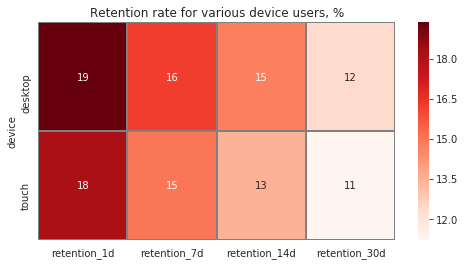

In [58]:
#visualizing retention rate for various device users

plt.figure(figsize=(8,4))
plt.title('Retention rate for various device users, %')
ax = sns.heatmap(df_devices_retention_rate, annot=True, linewidth=1, linecolor='gray', cmap='Reds')
#ax.set_yticklabels(output2.index.strftime('%Y-%m-%d'))
plt.show()

In [59]:
#calculating the number of users in each retention category for various ad sources

sources_unique_users = retention_rate.groupby('source_id').agg({'uid':'nunique'}).reset_index()
sources_unique_users.columns = ['source_id', 'n_users']
sources_retention_1d = retention_rate[retention_rate['retention_1d'] == 1].groupby('source_id').agg({'uid':'nunique'}).reset_index()
sources_retention_1d.columns = ['source_id', 'n_users_1d']
sources_retention_7d = retention_rate[retention_rate['retention_7d'] == 1].groupby('source_id').agg({'uid':'nunique'}).reset_index()
sources_retention_7d.columns = ['source_id', 'n_users_7d']
sources_retention_14d = retention_rate[retention_rate['retention_14d'] == 1].groupby('source_id').agg({'uid':'nunique'}).reset_index()
sources_retention_14d.columns = ['source_id', 'n_users_14d']
sources_retention_30d = retention_rate[retention_rate['retention_30d'] == 1].groupby('source_id').agg({'uid':'nunique'}).reset_index()
sources_retention_30d.columns = ['source_id', 'n_users_30d']

In [60]:
#merging number of users in one table

dfs_sources = [sources_unique_users, sources_retention_1d, sources_retention_7d, sources_retention_14d, sources_retention_30d]

df_sources_merged = reduce(lambda  left,right: pd.merge(left,right,on=['source_id'],
                                            how='outer'), dfs_sources)

In [61]:
#calculating retention rate for every category for various ad sources

df_sources_merged['retention_1d'] = df_sources_merged['n_users_1d'] / df_sources_merged['n_users']
df_sources_merged['retention_7d'] = df_sources_merged['n_users_7d'] / df_sources_merged['n_users']
df_sources_merged['retention_14d'] = df_sources_merged['n_users_14d'] / df_sources_merged['n_users']
df_sources_merged['retention_30d'] = df_sources_merged['n_users_30d'] / df_sources_merged['n_users']

In [62]:
#compiling a dataframe with retention rate for various devices

df_sources_retention_rate = df_sources_merged[['source_id', 'retention_1d', 'retention_7d', 'retention_14d', 'retention_30d']].set_index('source_id')
df_sources_retention_rate = (df_sources_retention_rate * 100).round(2) #.astype(str) + '%'
df_sources_retention_rate

,retention_1d,retention_7d,retention_14d,retention_30d
source_id,,,,
1,37.15,27.64,23.96,19.27
2,38.54,31.63,28.18,23.19
3,16.37,14.21,13.13,11.35
4,19.91,17.03,15.44,12.84
5,14.96,12.45,11.14,9.22
6,40.00,40.00,40.00,20.00
7,6.06,6.06,6.06,6.06
9,44.45,41.16,38.28,32.88
10,17.24,13.61,12.22,10.02


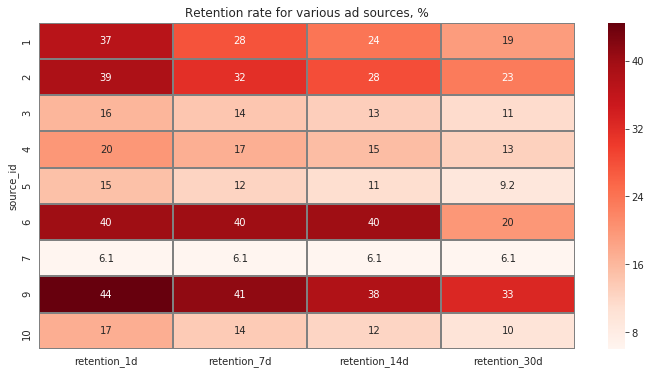

In [63]:
#visualizing retention rate for various device users

plt.figure(figsize=(12,6))
plt.title('Retention rate for various ad sources, %')
ax = sns.heatmap(df_sources_retention_rate, annot=True, linewidth=1, linecolor='gray', cmap='Reds')
#ax.set_yticklabels(output2.index.strftime('%Y-%m-%d'))
plt.show()

<a id="section2_1_4c"></a>

What can we say about the retention rate? If we look at various devices, we see that retention rate is little bit higher for desktop users. Now let's take a look on various ad sources. Sources number 6 and 7 are not very informative due to very low number of initial users (5 and 33), so retention rate here is not very representative. We also see that there are sources 3, 4, 5, and 10 with pretty close retention rates (15-20% for 1d, 9-13% for 30d), while sources 1, 2, and 9 have significantly higher retention rates (37-44% for 1d, 19-33% for 30d).
All in all, ad source 9 seems to have the highest retention rate.

<a id="section2_2"></a>

### Sales

<a id="section2_2_1"></a>
#### When do people start buying? 

In [64]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [65]:
#extracting first order date

first_order_dates = orders.groupby('uid')['buy_ts'].min()
first_order_dates.name = 'first_order_date'

In [66]:
#adding it to orders df as a new column

orders = orders.join(first_order_dates, on='uid')

In [67]:
#creating a dataframe with first visit dates for unique user ids

first_visit_dates = visits[['uid', 'first_visit_date']]
first_visit_dates = first_visit_dates.drop_duplicates(subset='uid')

In [68]:
#merging in one dataframe to calculate conversion

conversion = pd.merge(first_order_dates, first_visit_dates, on='uid', how='left')

In [69]:
#checking for corrupted data, where first visit comes after first order

len(conversion[conversion['first_order_date'] < conversion['first_visit_date']])

195

In [70]:
#dropping this data

conversion = conversion.drop(conversion[conversion['first_order_date'] < conversion['first_visit_date']].index)

In [71]:
#adding new column with conversion time in days

conversion['conversion_days'] = (conversion['first_order_date'] - conversion['first_visit_date']) / np.timedelta64(1, 'D')
conversion['conversion_days'] = conversion['conversion_days'].round()

In [72]:
#checking for missing values (uid that have orders but don't have visits)

len(conversion[conversion['conversion_days'].isna()])

442

In [73]:
#dropping this data

conversion = conversion.drop(conversion[conversion['conversion_days'].isna()].index)

In [74]:
#checking the distribution

conversion['conversion_days'].describe()

count    35886.000000
mean        15.733907
std         45.442648
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        363.000000
Name: conversion_days, dtype: float64

In [75]:
conversion

,uid,first_order_date,first_visit_date,conversion_days
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...,...
36517,18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00,0.0
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0.0
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231.0
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103.0


In [76]:
#creating a df with user ids and source id (one for each user)

#is there a way to reduce executing time for this function?

user_source_id = visits.groupby('uid')['source_id'].apply(lambda x: x.mode().iloc[0])

In [77]:
#adding source ids to conversion table

conversion = pd.merge(conversion, user_source_id, on='uid')

In [78]:
#slicing column with devices

user_devices = visits[['uid', 'device']]

In [79]:
#adding devices column to conversion table

conversion = pd.merge(conversion, user_devices, on='uid')

In [80]:
#checking number of users on different conversion days

general_conversion = conversion.groupby('conversion_days').agg({'uid':'nunique'}).reset_index()
general_conversion.columns = ['conversion_days', 'unique_users']
general_conversion['conversion_days'] = general_conversion['conversion_days'].astype(int)
general_conversion

,conversion_days,unique_users
0,0,25330
1,1,1707
2,2,626
3,3,478
4,4,338
...,...,...
340,352,2
341,355,2
342,357,3
343,358,1


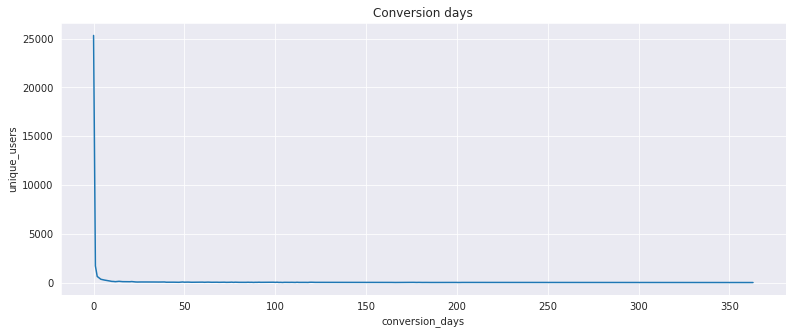

In [81]:
#visualizing users' conversion in days

plt.figure(figsize=(13,5))
plt.title('Conversion days')
sns.set_style("darkgrid")
sns.lineplot(data=general_conversion, x="conversion_days", y="unique_users")
plt.show()

In [82]:
#calculating conversion for various devices

conversion_devices = conversion.query('conversion_days <= 20').copy()
conversion_devices = conversion_devices.pivot_table(index='conversion_days', columns='device', values='uid', aggfunc='nunique')
conversion_devices.head()

device,desktop,touch
conversion_days,,
0.0,21249,5137
1.0,1365,516
2.0,501,207
3.0,368,174
4.0,276,107


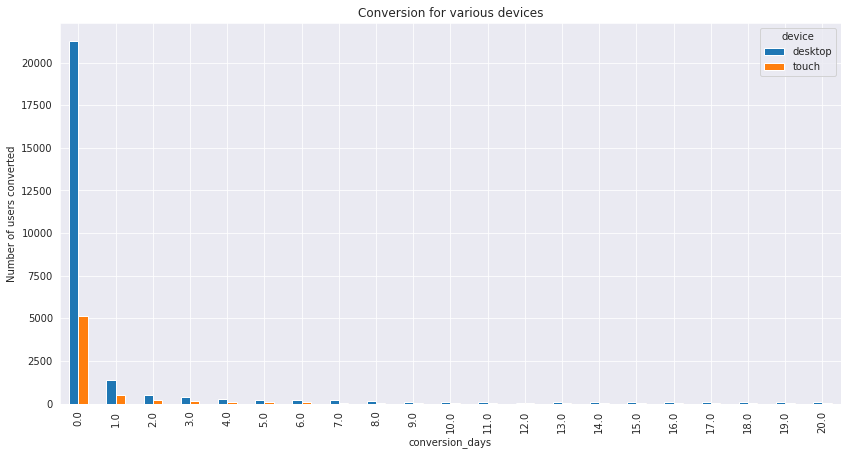

In [83]:
#visualizing conversion for various devices (range from 0 to 20 days)

ax = conversion_devices.plot(kind="bar", figsize=(14,7), grid=True, title='Conversion for various devices')
ax.set_ylabel('Number of users converted')
plt.show()

In [84]:
#calculating conversion for various ad sources

conversion_sources = conversion.query('conversion_days <= 10').copy()
conversion_sources = conversion_sources.pivot_table(index='conversion_days', columns='source_id', values='uid', aggfunc='nunique')
conversion_sources.head()

source_id,1,2,3,4,5,7,9,10
conversion_days,,,,,,,,
0.0,3243.0,2944.0,6738.0,6590.0,4503.0,1.0,508.0,803.0
1.0,402.0,312.0,357.0,374.0,188.0,NaN,39.0,35.0
2.0,141.0,104.0,140.0,132.0,77.0,NaN,13.0,19.0
3.0,88.0,96.0,97.0,122.0,53.0,NaN,14.0,8.0
4.0,61.0,61.0,80.0,85.0,30.0,NaN,9.0,12.0


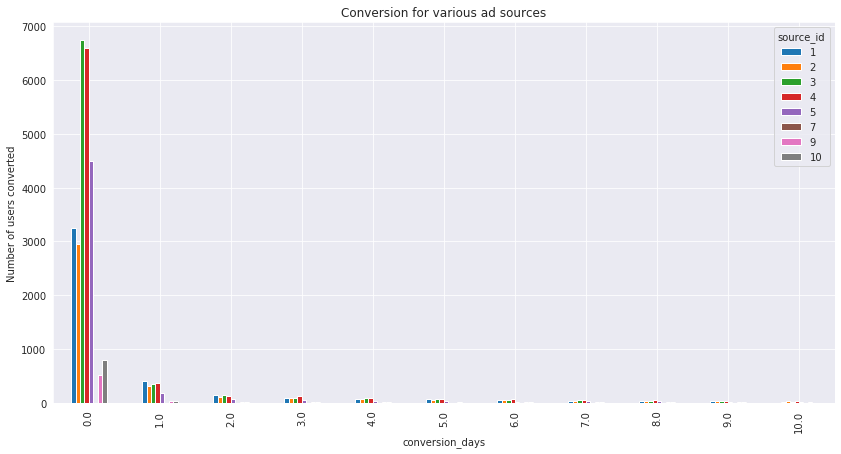

In [85]:
#visualizing conversion for various ad sources

ax=conversion_sources.plot(kind="bar", figsize=(14,7), grid=True, title='Conversion for various ad sources')
ax.set_ylabel('Number of users converted')
plt.show()

<a id="section2_2_1c"></a>

We see that most of the users (almost all of them) convert the same day they first visit the app. If we check conversion for various devices and ad sources, we see the same tendency everywhere.

In [86]:
((conversion['first_order_date'] - conversion['first_visit_date']) / np.timedelta64(1, 'h')).describe()

count    90914.000000
mean       768.627287
std       1484.944376
min          0.000000
25%          0.150000
50%         20.983333
75%        771.400000
max       8719.066667
dtype: float64

<a id="section2_2_2"></a>

#### How many orders do they make during a given period of time?

In [87]:
#extracting order year, month, week, and day

orders['order_year'] = orders['buy_ts'].dt.year
orders['order_month'] = orders['buy_ts'].dt.month
orders['order_week'] = orders['buy_ts'].dt.week
orders['order_date'] = orders['buy_ts'].dt.date

In [88]:
#adding source id column

orders = orders.merge(user_source_id, on='uid', how='left')

In [89]:
#removing duplicates from df with user ids and devices so it won't affect our df when merging

user_devices = user_devices.drop_duplicates(subset='uid')

In [90]:
#adding device column

orders = orders.merge(user_devices, on='uid', how='left')

In [91]:
orders.sample(10)

,buy_ts,revenue,uid,first_order_date,order_year,order_month,order_week,order_date,source_id,device
16148,2017-11-04 20:28:00,0.61,9077424145538040718,2017-11-04 20:28:00,2017,11,44,2017-11-04,2.0,touch
30454,2018-01-22 12:42:00,6.72,1286276010647190057,2018-01-22 12:42:00,2018,1,4,2018-01-22,4.0,desktop
35561,2018-02-18 18:19:00,0.61,2640274821355022551,2018-02-18 18:19:00,2018,2,7,2018-02-18,3.0,desktop
24569,2017-12-17 14:34:00,2.44,7571351885134571013,2017-12-17 14:34:00,2017,12,50,2017-12-17,3.0,desktop
17390,2017-11-13 22:22:00,1.22,11854059512782029926,2017-11-13 22:22:00,2017,11,46,2017-11-13,4.0,touch
3137,2017-07-12 14:38:00,9.78,16915314338652331119,2017-07-12 14:38:00,2017,7,28,2017-07-12,4.0,touch
13125,2017-10-16 22:06:00,12.34,11218248891942632814,2017-09-09 19:56:00,2017,10,42,2017-10-16,2.0,desktop
13817,2017-10-20 23:46:00,2.44,5241381887807240587,2017-10-20 23:46:00,2017,10,42,2017-10-20,4.0,desktop
38091,2018-03-04 12:01:00,0.73,10765652490730753803,2018-01-22 22:38:00,2018,3,9,2018-03-04,5.0,desktop
9485,2017-09-28 16:17:00,1.53,13783282244946171187,2017-09-28 16:17:00,2017,9,39,2017-09-28,4.0,desktop


In [92]:
#calculating number of orders from various devices

orders_devices = orders.pivot_table(index='order_month', columns='device', values='uid', aggfunc='count')
orders_devices

device,desktop,touch
order_month,,
1,3766,910
2,4172,1061
3,4242,1017
4,2690,551
5,3494,802
6,1949,385
7,1843,499
8,1473,322
9,2757,602


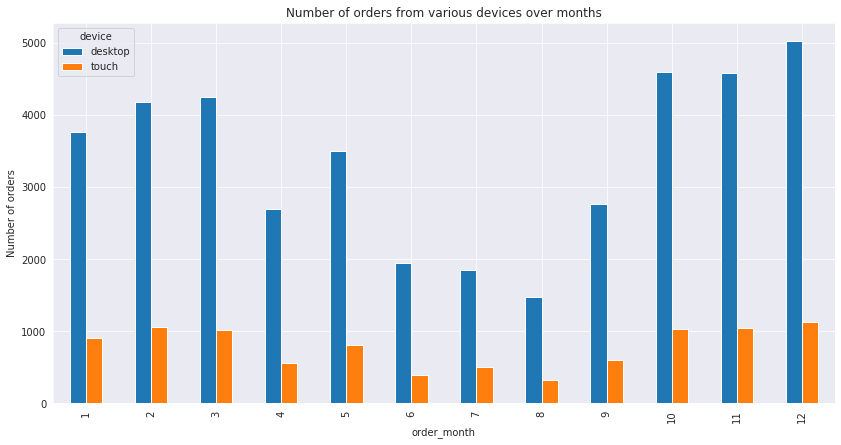

In [93]:
#visualizing number of orders from various devices over months

ax=orders_devices.plot(kind="bar", figsize=(14,7), grid=True, title='Number of orders from various devices over months')
ax.set_ylabel('Number of orders')
plt.show()

In [94]:
#calculating number of orders from various ad sources

orders_sources = orders.pivot_table(index='order_month', columns='source_id', values='uid', aggfunc='count')
orders_sources

source_id,1.0,2.0,3.0,4.0,5.0,7.0,9.0,10.0
order_month,,,,,,,,
1,731.0,823.0,1011.0,1181.0,727.0,NaN,125.0,78.0
2,840.0,951.0,1185.0,1239.0,789.0,NaN,114.0,115.0
3,869.0,1008.0,1096.0,1202.0,713.0,NaN,218.0,153.0
4,539.0,628.0,667.0,785.0,458.0,NaN,66.0,98.0
5,759.0,1006.0,887.0,867.0,582.0,NaN,78.0,117.0
6,356.0,414.0,608.0,419.0,369.0,NaN,78.0,90.0
7,356.0,412.0,487.0,511.0,477.0,NaN,58.0,41.0
8,270.0,281.0,346.0,365.0,405.0,1.0,92.0,35.0
9,546.0,623.0,728.0,625.0,693.0,NaN,86.0,58.0


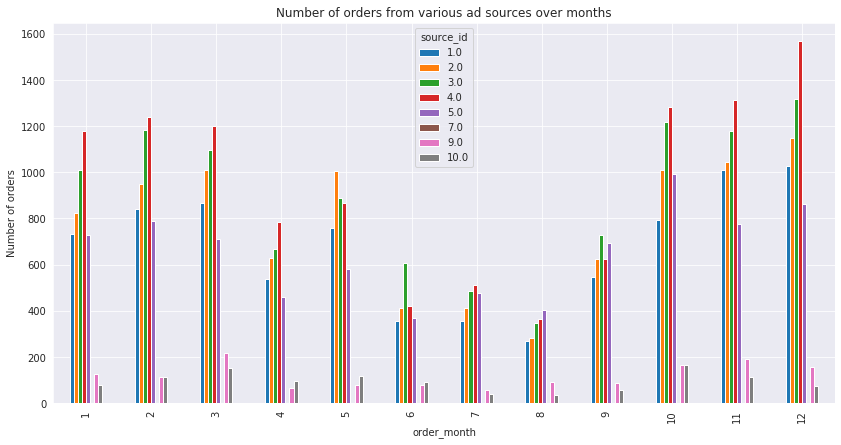

In [95]:
#visualizing number of orders from various ad sources over months

ax=orders_sources.plot(kind="bar", figsize=(14,7), grid=True, title='Number of orders from various ad sources over months')
ax.set_ylabel('Number of orders')
plt.show()

<a id="section2_2_2c"></a>

We'll check the number of monthly orders, since we have data for a year.
If we take a look at number of orders from various devices, we see that the number of orders from touch users is small relatively to that of desktop users.
What about various ad sources? The biggest number of orders comes from source 4, then goes source 3, source 2, source 5, and source 1. Sources 7, 9, and 10 have non-significant number of orders relatively to other sources

In [96]:
#extracting first order month to make cohorts

orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [97]:
#extracting order month

orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [98]:
#calculating cohort sizes

cohort_sizes = orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [99]:
#there is one person who made an order in June 2018, we'll take him out so he won't affect our calculations and we'll have 12 cohorts

orders = orders.drop(orders[orders['first_order_date'] > "2018-06-01 00:00:00"].index)

In [100]:
#adding cohort sizes to orders table

orders = pd.merge(orders, cohort_sizes, on='first_order_month')

In [101]:
#calculating cohort age

orders['age'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['age'] = orders['age'].round().astype('int')

In [102]:
#compiling pivot table with number of monthly orders for each cohort

orders_grouped_by_cohorts = orders.pivot_table(index='first_order_month', columns='age', values='uid', aggfunc='count')
orders_grouped_by_cohorts.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2354.0,177,174,226,292,218,276,174,212,153,96,86
2017-07-01,2186.0,100,120,104,72,82,61,50,58,24,53,
2017-08-01,1533.0,108,100,81,85,62,49,78,46,46,,
2017-09-01,2933.0,219,161,164,67,109,108,56,61,,,
2017-10-01,4964.0,314,162,122,129,103,86,125,,,,
2017-11-01,4813.0,397,182,211,136,59,102,,,,,
2017-12-01,5052.0,270,202,179,86,105,,,,,,
2018-01-01,3783.0,224,159,64,78,,,,,,,
2018-02-01,4095.0,222,83,70,,,,,,,,


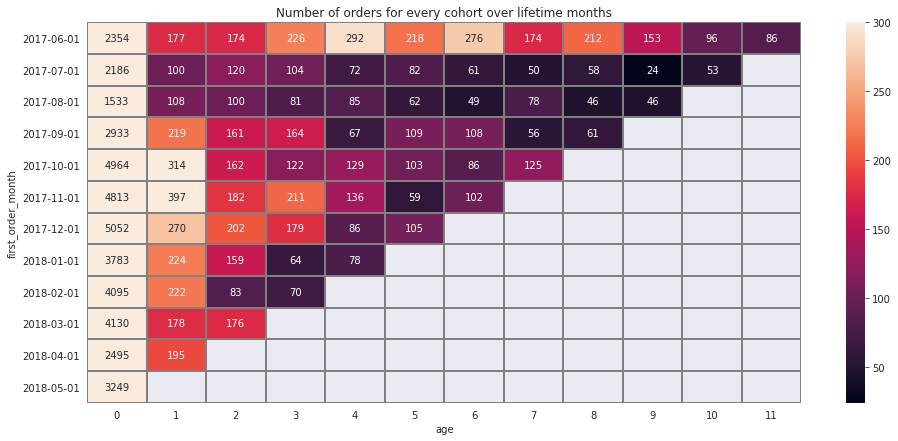

In [146]:
#visualizing the number of orders for every cohort over lifetime months

plt.figure(figsize=(16,7))
plt.title('Number of orders for every cohort over lifetime months')
ax = sns.heatmap(orders_grouped_by_cohorts, annot=True, fmt='g', linewidth=1, linecolor='gray', vmax=300)
ax.set_yticklabels(orders_grouped_by_cohorts.index.strftime('%Y-%m-%d'))
plt.show()

In [104]:
#calculating the average number of orders for every lifetime month

n_orders = orders_grouped_by_cohorts.mean(axis=0).round().astype('int')
n_orders

age
0     3466
1      219
2      152
3      136
4      118
5      105
6      114
7       97
8       94
9       74
10      74
11      86
dtype: int64

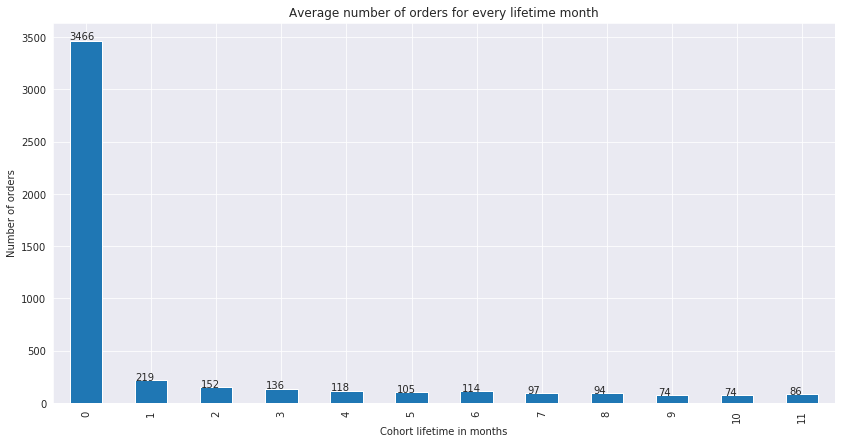

In [105]:
#visualizing the average number of orders for every lifetime month

ax = n_orders.plot(kind="bar", figsize=(14,7), grid=True, title='Average number of orders for every lifetime month')
ax.set_ylabel('Number of orders')
ax.set_xlabel('Cohort lifetime in months')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [106]:
#calculating cumulative average number of orders for lifetime months

cumulative_n_orders = n_orders.cumsum()

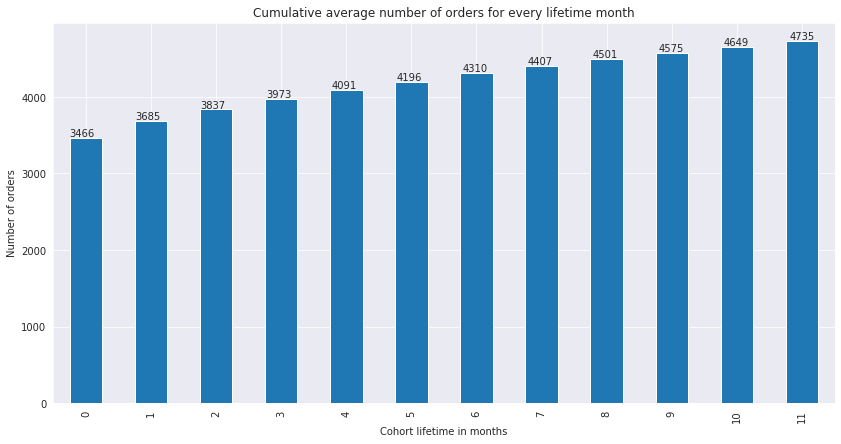

In [107]:
#visualizing the cumulative average number of orders for every lifetime month

ax = cumulative_n_orders.plot(kind="bar", figsize=(14,7), grid=True, title='Cumulative average number of orders for every lifetime month')
ax.set_ylabel('Number of orders')
ax.set_xlabel('Cohort lifetime in months')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [108]:
#adding cohort sizes to the df

orders_per_user_grouped_by_cohorts = orders_grouped_by_cohorts.merge(cohort_sizes, on='first_order_month').set_index('first_order_month')

In [109]:
#calculating number of orders per user for every cohort over lifetime months

orders_per_user_grouped_by_cohorts = orders_per_user_grouped_by_cohorts[[0,1,2,3,4,5,6,7,8,9,10,11]].div(orders_per_user_grouped_by_cohorts.n_buyers, axis=0).round(3)
orders_per_user_grouped_by_cohorts.fillna('')

,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.164,0.087,0.086,0.112,0.144,0.108,0.136,0.086,0.105,0.076,0.047,0.043
2017-07-01,1.137,0.052,0.062,0.054,0.037,0.043,0.032,0.026,0.03,0.012,0.028,
2017-08-01,1.119,0.079,0.073,0.059,0.062,0.045,0.036,0.057,0.034,0.034,,
2017-09-01,1.136,0.085,0.062,0.064,0.026,0.042,0.042,0.022,0.024,,,
2017-10-01,1.144,0.072,0.037,0.028,0.03,0.024,0.02,0.029,,,,
2017-11-01,1.179,0.097,0.045,0.052,0.033,0.014,0.025,,,,,
2017-12-01,1.153,0.062,0.046,0.041,0.02,0.024,,,,,,
2018-01-01,1.122,0.066,0.047,0.019,0.023,,,,,,,
2018-02-01,1.122,0.061,0.023,0.019,,,,,,,,


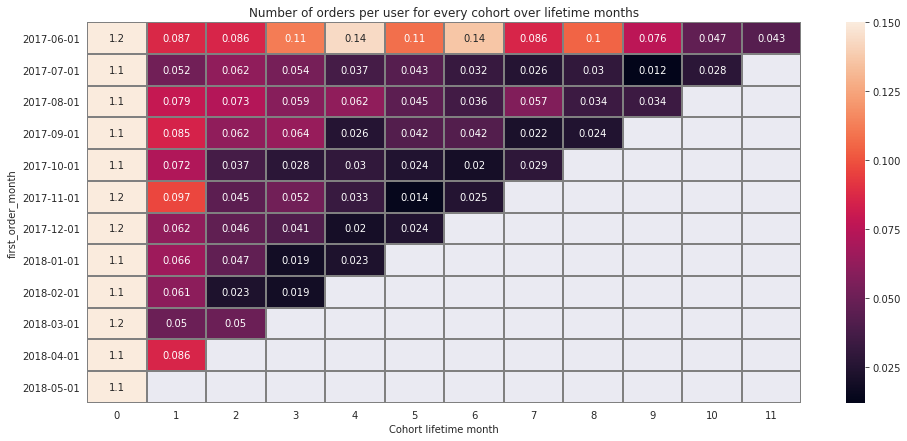

In [144]:
#visualizing the number of orders per user for every cohort over lifetime months

plt.figure(figsize=(16,7))
plt.title('Number of orders per user for every cohort over lifetime months')
ax = sns.heatmap(orders_per_user_grouped_by_cohorts, annot=True, linewidth=1, linecolor='gray', vmax=0.15)
ax.set_yticklabels(orders_per_user_grouped_by_cohorts.index.strftime('%Y-%m-%d'))
ax.set_xlabel('Cohort lifetime month')
plt.show()

<a id="section2_2_2c1"></a>

If we take a look at the number of orders people make, we see that this number is very high in the 0th lifetime month, from 1533 to 5052 orders, which gives us 1.1 - 1.2 orders per user. In the 1st lifetime month, number of orders significantly decreases to 100 - 397 orders, which is 0.05 - 0.097 orders per user. With every lifetime month, the average number of orders slowly decreases, although in some of the cohorts we see increases on 4th/5th/6th/7th lifetime month.

<a id="section2_2_3"></a>

#### What is the average purchase size?

In [111]:
#average revenue size

orders['revenue'].describe() #we won't use mean since the distribution is not normal

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [112]:
print('Average revenue size in general:', orders['revenue'].median())

Average revenue size in general: 2.5


In [113]:
#calculating average revenue from every cohort for various devices

avg_revenue_devices = orders.pivot_table(index='first_order_month', columns='device', values='revenue', aggfunc='mean').round(2)
avg_revenue_devices

device,desktop,touch
first_order_month,,
2017-06-01,5.39,5.58
2017-07-01,5.67,5.17
2017-08-01,5.50,4.45
2017-09-01,9.79,5.41
2017-10-01,4.69,4.28
2017-11-01,4.40,4.58
2017-12-01,6.25,3.32
2018-01-01,3.97,3.50
2018-02-01,3.78,3.55


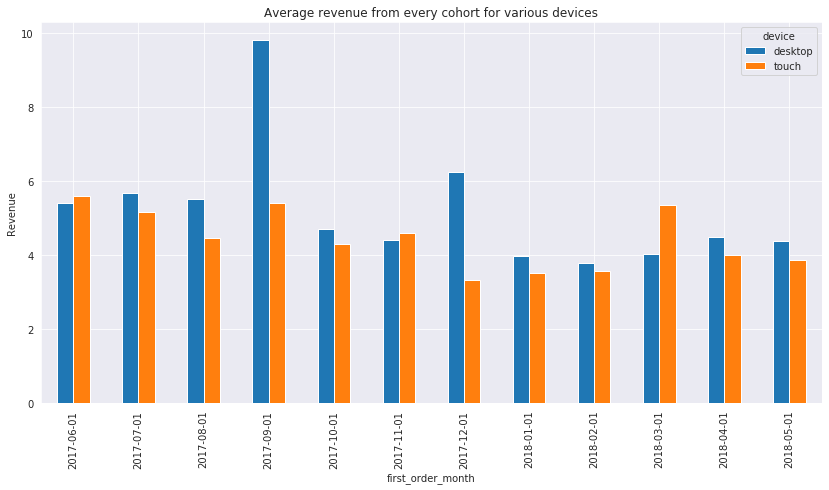

In [114]:
#visualizing average revenue from every cohort for various devices

ax = avg_revenue_devices.plot(kind="bar", figsize=(14,7), grid=True, title='Average revenue from every cohort for various devices')
ax.set_ylabel('Revenue')
ax.set_xticklabels(avg_revenue_devices.index.strftime('%Y-%m-%d'))
plt.show()

In [115]:
#calculating average revenue from every cohort for various ad sources

avg_revenue_sources = orders.pivot_table(index='first_order_month', columns='source_id', values='revenue', aggfunc='mean').round(2)
avg_revenue_sources

source_id,1.0,2.0,3.0,4.0,5.0,7.0,9.0,10.0
first_order_month,,,,,,,,
2017-06-01,8.37,6.77,3.15,3.97,4.89,NaN,3.13,1.77
2017-07-01,7.51,6.14,4.93,4.80,4.61,NaN,4.17,1.97
2017-08-01,7.37,5.37,4.98,4.29,5.70,1.22,3.32,4.17
2017-09-01,8.89,20.39,4.44,3.88,4.71,NaN,2.44,1.92
2017-10-01,5.71,6.27,3.77,3.79,4.84,NaN,3.02,2.48
2017-11-01,5.87,4.53,3.94,4.22,3.92,NaN,3.36,3.29
2017-12-01,3.71,13.42,3.96,3.66,4.43,NaN,3.09,3.58
2018-01-01,5.06,3.78,3.70,3.57,3.63,NaN,2.41,2.78
2018-02-01,4.08,3.84,3.66,3.65,3.75,NaN,3.82,2.23


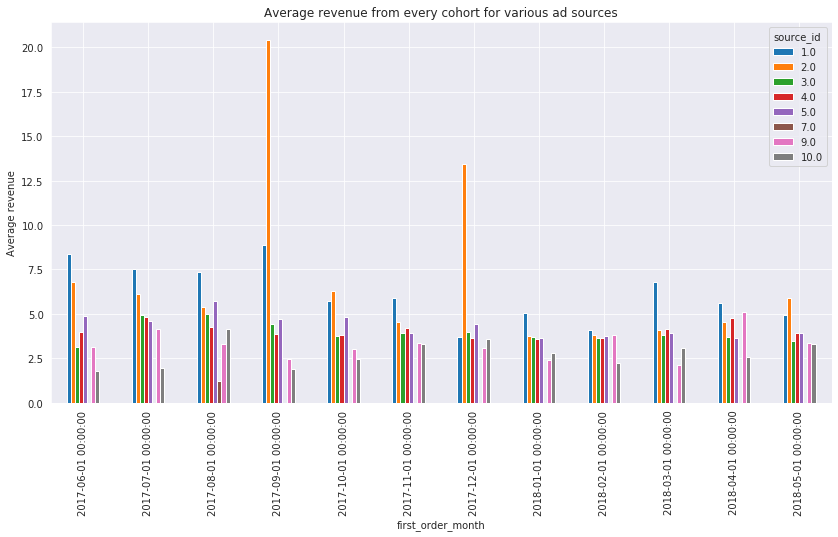

In [116]:
#visualizing average revenue from every cohort for various ad sources

ax=avg_revenue_sources.plot(kind="bar", figsize=(14,7), grid=True, title='Average revenue from every cohort for various ad sources')
ax.set_ylabel('Average revenue')
plt.show()

<a id="section2_2_3c"></a>

First of all, from both graphs we see that there are two outstanding months - Septemberand December. Average revenue in these months is significantly bigger, than in others.
Exept for these two months, where average revenue from desktop users is higher than that of touch users, average revenue from various devices is pretty close, although for desktop users average revenue is slightly higher.
As for various ad sources - source 1 leading almost in every month exept for September and December, where we see huge peaks in average revenue from source 2. Other sources have lower average revenue, but not significantly.

<a id="section2_2_4"></a>

#### How much money do they bring? (LTV)

In [117]:
#creating copy of orders df only with columns needed

orders_ = orders[['first_order_month', 'order_month', 'buy_ts', 'revenue', 'uid', 'source_id', 'device']].copy()

In [118]:
#calculating cohort revenue

cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()

In [119]:
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
73,2018-03-01,2018-04-01,1063.05
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92


In [120]:
#compiling a report

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92


In [121]:
#calculating LTV
#margin rate is not specified in description, so we'll leave it as 1, therefore gross profit = revenue in our case.

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']
report['ltv_cumulative'] = report.groupby(['first_order_month'])['ltv'].apply(lambda x: x.cumsum())

In [122]:
report

,first_order_month,n_buyers,order_month,revenue,age,ltv,ltv_cumulative
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,5.209743
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,5.647380
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,6.602051
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,7.624582
...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,5.139694
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,5.455253
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,5.189196


In [123]:
ltv_cohorts = report.pivot_table(index='first_order_month', columns='age', values='ltv_cumulative', aggfunc='mean').round(3)
ltv_cohorts.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.21,5.647,6.602,7.625,8.36,9.311,9.892,10.445,11.051,11.622,11.879
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,,
2017-09-01,5.645,6.762,7.283,11.259,11.659,12.306,13.008,13.251,13.435,,,
2017-10-01,5.004,5.539,5.731,5.888,6.04,6.16,6.245,6.36,,,,
2017-11-01,5.155,5.554,5.753,6.078,6.226,6.28,6.395,,,,,
2017-12-01,4.738,4.999,5.924,6.989,7.302,7.64,,,,,,
2018-01-01,4.136,4.43,4.735,4.877,4.94,,,,,,,
2018-02-01,4.157,4.435,4.514,4.588,,,,,,,,


In [124]:
#calculating LTV

print('Average LTV for 3 months lifetime:', ltv_cohorts[2].mean().round(2))
print('Average LTV for 6 months lifetime:', ltv_cohorts[5].mean().round(2))
print('Average LTV for 9 months lifetime:', ltv_cohorts[8].mean().round(2))

Average LTV for 3 months lifetime: 5.82
Average LTV for 6 months lifetime: 7.97
Average LTV for 9 months lifetime: 10.06


<a id="section2_2_4c"></a>

We see that after 0th lifetime months the LTV increases slowly, with average LTV for first three months being 5.82, average LTV for first six month of 7.97, and average LTV for the ninth month of 10.06

<a id="section2_3"></a>

### Marketing

<a id="section2_3_1"></a>

#### How much money was spent? Overall/per source/over time

In [125]:
costs.sample(10)

,source_id,dt,costs
536,2,2017-11-21,167.37
1109,4,2017-06-21,52.60
1932,9,2017-09-25,18.92
410,2,2017-07-18,80.87
2418,10,2018-01-26,30.38
1425,4,2018-05-05,160.29
1689,5,2018-01-24,194.00
2069,9,2018-02-09,21.51
900,3,2017-11-22,508.41
1259,4,2017-11-18,312.73


In [126]:
#extracting month

costs['month'] = costs['dt'].astype('datetime64[M]')

In [127]:
#calculating overall expences

print('Overall expenses:', costs['costs'].sum())

Overall expenses: 329131.62


In [128]:
#compiling a pivot table with expences on various sources over time

costs_sources = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
costs_sources

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


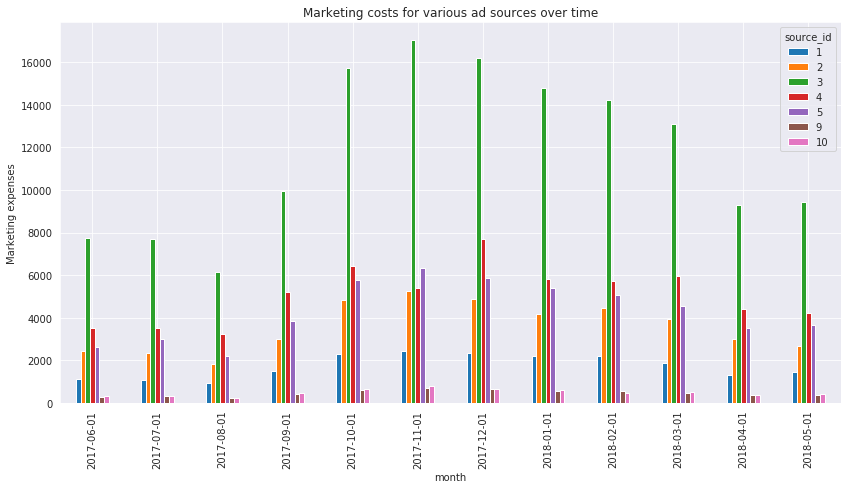

In [129]:
#visualizing marketing costs for various ad sources over time

ax = costs_sources.plot(kind="bar", figsize=(14,7), grid=True, title='Marketing costs for various ad sources over time')
ax.set_xticklabels(costs_sources.index.strftime('%Y-%m-%d'))
ax.set_ylabel('Marketing expenses')
plt.show()

<a id="section2_3_1c"></a>

The picture is pretty clear - company spends a lot on marketing expenses for source 3, significantly more than on other sources. Then we have sources 2, 4, and 5 with similar costs, 1 with lower expences, and 9 and 10 with very low expenses.
Overall we can say that the company spends way less money on marketing in summer, little bit more in September, April and May, and the biggest expences we see from October to March.

<a id="section2_3_2"></a>

#### How much did customer acquisition from each of the sources cost?

In [130]:
#calculating marketing expenses per source

sources_cost = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').reset_index()
sources_cost

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [131]:
#calculating unique number of users for each ad source

n_users_per_source = visits.groupby('source_id').agg({'uid':'nunique'}).reset_index()
n_users_per_source['source_id'] = n_users_per_source['source_id'].astype('int')
n_users_per_source

,source_id,uid
0,1,17960
1,2,24152
2,3,67284
3,4,75080
4,5,50921
5,6,5
6,7,33
7,9,8504
8,10,7208


In [132]:
#merging together

cac_general = sources_cost.merge(n_users_per_source, on='source_id', how='left')

In [133]:
cac_general['cac'] = (cac_general['costs'] / cac_general['uid']).round(2)
cac_general

,source_id,costs,uid,cac
0,1,20833.27,17960,1.16
1,2,42806.04,24152,1.77
2,3,141321.63,67284,2.10
3,4,61073.60,75080,0.81
4,5,51757.10,50921,1.02
5,9,5517.49,8504,0.65
6,10,5822.49,7208,0.81


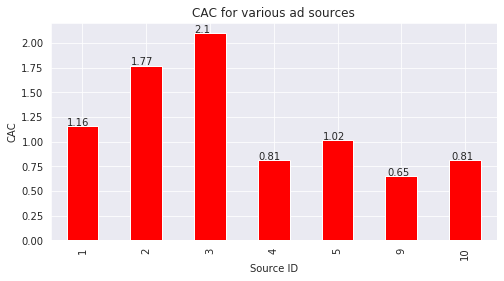

In [134]:
#visualizing CAC for various ad sources

ax = cac_general['cac'].plot(kind="bar", figsize=(8,4), grid=True, title='CAC for various ad sources', color='red')
ax.set_xlabel('Source ID')
ax.set_ylabel('CAC')
ax.set_xticklabels(cac_general['source_id'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

<a id="section2_3_2c"></a>

Sources 4, 9 and 10 have a customer acquisition cost lower than 1, for source 5 CAC equals 1.02, and the most "expensive" ones are source 1 with CAC of 1.16, source 2 with CAC of 1.77 and source 3 with CAC of 2.1

<a id="section2_3_3"></a>

#### How worthwhile where the investments? (ROMI)

In [135]:
#calculating marketing expenses for every month

costs_months = costs.groupby('month').agg({'costs':'sum'}).reset_index()

In [136]:
#adding column to report table

report = pd.merge(report, costs_months, left_on='first_order_month', right_on='month')

In [137]:
#calculating CAC

report['cac'] = (report['costs'] / report['n_buyers']).round(2)

In [138]:
#calculating ROMI

report['romi'] = (report['ltv_cumulative'] / report['cac']).round(2)

romi_cohorts = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
romi_cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.63,0.74,0.86,0.94,1.04,1.11,1.17,1.24,1.30,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.83,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.24,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.50,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# average romi

romi_cohorts.mean(axis=0)

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.785000
5     0.860000
6     0.896667
7     0.968000
8     1.052500
9     0.963333
10    1.090000
11    1.330000
dtype: float64

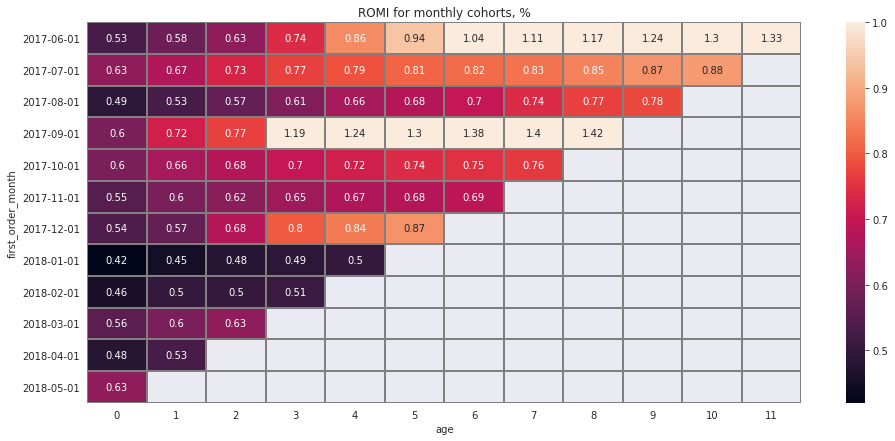

In [148]:
#visualizing ROMI for monthly cohorts

plt.figure(figsize=(16,7))
plt.title('ROMI for monthly cohorts, %')
ax = sns.heatmap(romi_cohorts, annot=True, linewidth=1, fmt='g', linecolor='gray', vmax=1.0)
ax.set_yticklabels(romi_cohorts.index.strftime('%Y-%m-%d'))
plt.show()

<a id="section2_3_3c"></a>

From the graph we see that meanwhile only June and September 2017 cohorts returned a marketing investment (June cohort did it on 6th lifetime month and September cohort did it on 3rd lifetime month). As for other cohorts - on average they return the investment on 8th lifetime month. If we take a closer look, we see that on average on 3rd lifetime month users return 71% of the investments and on 6th lifetime month users return 89% of investments.

<a id="section3"></a>

## Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

#### What sources/platforms would you recommend? 
##### Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

Which platform is more interesting? Obviously, we're talking about desktop - number of active users (around 70%) is higher than that of touch users (around 30%), and eventhough the average revenue is similar for these two platforms, the number of orders is significantly higher for desktop users, and retention rate is a little bit higher, therefore, I would recommend to focus on desktop users.

What about different ad sources? Most popular (in terms of the number of active users) are sources 4, 3, 5, and 2. Highest numbers of orders come from sources 4, 3, 2, and 5. Highest average revenue sources are sources 1 and 2, then go sources 3, 4, and 5. With that, sources with lowest CAC are sources 9 and 10 (which are less interesting in terms of number of orders and average revenue), and sources 4 and 5. Sources 3, 2, and 1 have the highest CAC, although it's still way lower than LTV, therefore, all of the sources are profitable.

I would recommend to continue to put money on marketing for sources 1 and 2 (relaively high number of orders, high average revenue, high number of active users, relatively high retention rate, and CAC is fine). I would recommend to cut some expenses in source 3, since the expenses for this source are the highest, and eventhough the number of active users and number of orders is pretty high, average revenue is not that high, and time of returning the investments is bigger than for other sources). I would also recommend to raise expences for marketing for sources 4 and 5 (low CAC, high nimber of active users, relatively high number of orders and average revenue). 

Sources 6 and 7 are not in the expenses list at all, so we don't have enough information to decide what to do with them. Sources 9 and 10 have relatively small number of users, although I would pay more attention to source 9, since the CAC for it is the lowest, and retention rate is the highest.